In [13]:
# import the pandas library bcoz pandas has database and table related functions
import pandas as pd
from sklearn.datasets import make_regression

In [14]:
# Here read the Salary_Data.csv by using pandas function and assigned values to the dataset variable.
dataset = pd.read_csv("insurance_pre.csv")

In [15]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [16]:
#Convert categorial data into numerical data
dataset = pd.get_dummies(dataset, drop_first = True);

In [17]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [18]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [19]:
#Split input and output
independent = dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dependent= dataset[["charges"]]

In [20]:
#Split the train and test set
from sklearn.model_selection import train_test_split
# Generate a synthetic regression dataset
independent, dependent = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state =0)

In [22]:
#create model
from sklearn.ensemble import AdaBoostRegressor
regressor  = AdaBoostRegressor(random_state=0, n_estimators=100)
regressor.fit(x_train,y_train)


AdaBoostRegressor(n_estimators=100, random_state=0)

In [25]:
y_pred = regressor.predict(x_test)

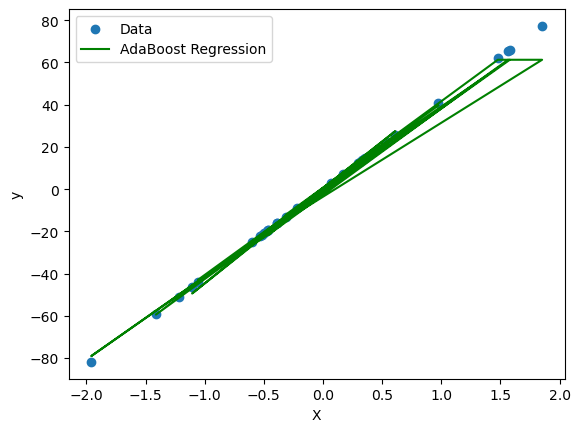

In [31]:
import matplotlib.pyplot as plt

# Plot the original data
plt.scatter(x_test, y_test, label="Data")

# Plot the predictions
plt.plot(x_test, y_pred, color='green', label="AdaBoost Regression")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [27]:
#Evaluation Metrics
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
r_score

0.9919185736402543

In [29]:
from sklearn.metrics import mean_squared_error
# Make predictions on the test set
y_pred = regressor.predict(x_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 11.57
